### Индивидуальная задача

На изображении, получаенной с камеры 

Необходимо обрезать изображение до размеров знака, повернуть  его на угол, равный наклону знака, улучшить качество изображения и обвести контур знака для его распознавания.

In [111]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [126]:
# загрузка изображения
imag = cv2.imread('sign.jpg')
imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)

In [143]:
# обрезаем изображение до размеров знака
crop = imag[193:235, 995:1045]
piece = cv2.resize(crop, (50,50), interpolation=cv2.INTER_LINEAR)

(h, w) = piece.shape[:2]

In [165]:
# определяем угол наклона знака 
angle = 90

img = piece

In [166]:
# получаем размеры изображения
(h, w) = img.shape[:2]


In [167]:
# получаем координаты центра изображения
center = (w // 2, h // 2)
# строим матрицу поворота
M = cv2.getRotationMatrix2D(center, angle, 1.0)

# поворачиваем изображение
rotated = cv2.warpAffine(img, M, (w, h))


In [168]:
# Применение метода "unsharp masking"
# Применение фильтра Гаусса

blur = cv2.GaussianBlur(rotated, (5,5), 0)
improved = cv2.addWeighted(rotated, 1.5, blur, -0.5, 0)


In [169]:

# переводим изображение в оттенки серого
gray = cv2.cvtColor(improved, cv2.COLOR_BGR2GRAY)

# бинаризуем изображение
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]


In [170]:
# находим контуры
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# рисуем контуры на исходном изображении
cv2.drawContours(improved, contours, -1, (0, 255, 0), 1);


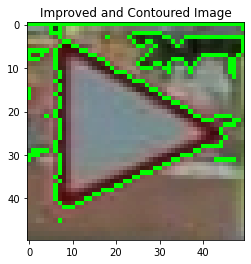

In [171]:
plt.title("Improved and Contoured Image")
plt.imshow(improved);